import raw data

In [29]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
df = pd.read_csv("data.csv")
df.head()

,x1,x2,y
0,4.153390,5.716331,0
1,2.967939,2.657065,0
2,0.769029,6.921437,0
3,4.069184,4.722792,0
4,6.244581,5.802384,0


get into matrix form

viz data

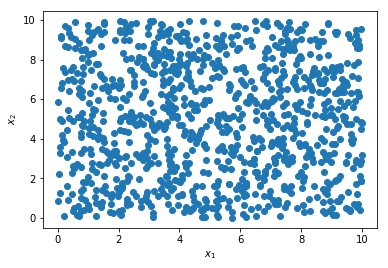

In [17]:
fig = plt.figure
plt.scatter(df["x1"], df["x2"])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()
            

In [18]:
numdata = df.shape[0]
print("nb_data:", numdata)

x = np.zeros((numdata,2))
y = np.zeros((numdata,1))
for i in range(numdata):
    x[i,0] = df.iloc[i]["x1"]
    x[i,1] = df.iloc[i]["x2"]
    y[i] = df.iloc[i]["y"]


nb_data: 1000


In [19]:
y_1 = df[df.y ==1]
y_0 = df[df.y ==0]


In [20]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

np.random.seed(3)
model = Sequential()
model.add(Dense(1,input_dim=2,activation ='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = LossHistory()
model.fit(x, y, epochs=5000, batch_size=1000,verbose=0, callbacks=[history])
scores = model.evaluate(x, y)
#model.get_weights()
#model.save_weights(filepath?)
#model.load_weights(filepath, by_name=False)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1000/1000 [==============================] - 0s 99us/step

acc: 81.80%


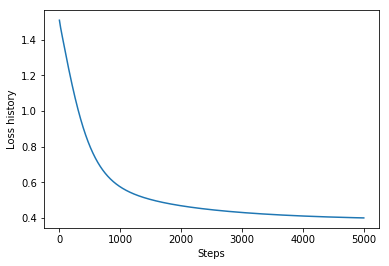

In [21]:
fig = plt.figure()
plt.plot(np.arange(5000), history.losses)
plt.xlabel("Steps")
plt.ylabel("Loss history")
plt.show()

In [22]:
y_pred = model.predict(x)
auc = roc_auc_score(y,y_pred)
fpr, tpr, thresholds = roc_curve(y,y_pred, pos_label=1)

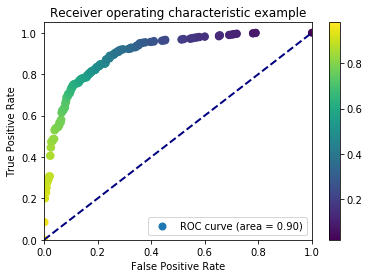

In [23]:
plt.figure()
lw = 2
plt.scatter(fpr,tpr,c=thresholds,
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.colorbar()
plt.show()

In [24]:
y_pred = model.predict(x)
idx_true_0 = y == 0

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y,y_pred > .5)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


NameError: name 'class_names' is not defined

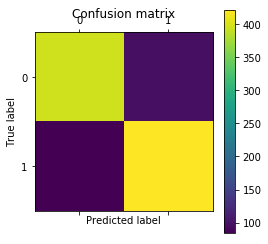

In [37]:
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred > .5)

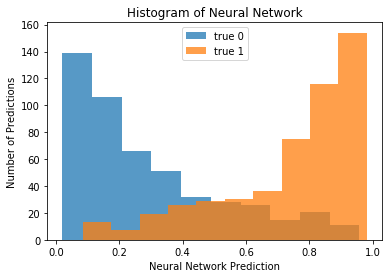

In [26]:
fig = plt.figure
plt.hist(y_pred[idx_true_0], alpha=.75, label='true 0')
plt.hist(y_pred[~idx_true_0], alpha=.75, label='true 1')
plt.xlabel('Neural Network Prediction') 
plt.ylabel('Number of Predictions')
plt.title('Histogram of Neural Network')
plt.legend()
plt.show()

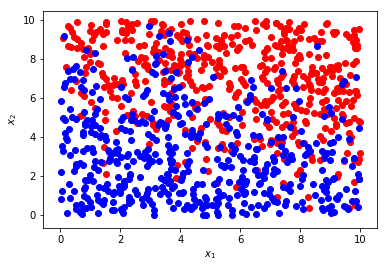

In [27]:
fig = plt.figure
for color in ['r']:
    plt.scatter(y_1["x1"],y_1["x2"], color=color)
    for color in['b']:
        plt.scatter(y_0["x1"],y_0["x2"],color=color)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

plot of y = 0 (blue) and y = 1 pts (red)

In [28]:
fig = plt.figure
plot_decision_boundary(lambda x: model.predict(x), x, y)

NameError: name 'plot_decision_boundary' is not defined